In [1]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pd.read_csv("../S&P_500.csv")

,Unnamed: 0,S&P_500,S&P_500_Company_Beta
0,0,MMM,0.072735
1,1,AOS,0.053118
2,2,ABT,0.214419
3,3,ABBV,0.664529
4,4,ACN,0.281733
...,...,...,...
496,496,YUM,0.201691
497,497,ZBRA,-0.627425
498,498,ZBH,0.334761
499,499,ZION,-0.635967


In [2]:
connection_string = "mongodb://localhost:27017"
client = pymongo.MongoClient(connection_string)
data_name = 'MemoireEsgf'
db = client[data_name]
collection = db.AI_PA

In [3]:
df__ = pd.DataFrame(list(collection.find()))
data__ = df__.drop('_id', axis=1)
data__.tail()

,Date,Open,High,Low,Close,Volume
159,2023-08-18,160.600006,160.919998,158.779999,160.639999,660753
160,2023-08-21,160.779999,162.160004,159.800003,160.039993,403510
161,2023-08-22,160.720001,162.240005,160.380005,160.880005,361550
162,2023-08-23,161.139999,162.279999,160.839996,161.839996,349760
163,2023-08-24,163.979996,165.440002,162.259995,162.699997,588931


In [ ]:
data__

In [6]:
stock_returns = data__['Close']#.pct_change().dropna()
#benchmark_returns = benchmark['Predictions'].pct_change().dropna()
#min_len = min(len(stock_returns), len(benchmark_returns))
stock_returns = stock_returns[-3:]
stock_returns

161    160.880005
162    161.839996
163    162.699997
Name: Close, dtype: float64

In [25]:
connection_string = "mongodb://localhost:27017"
client = pymongo.MongoClient(connection_string)
data_name = 'IndiceMarketPred'
db = client[data_name]
collection = db.ASX_200_Pred

In [26]:
data_name2 = 'MemoireIndiceMarket'
db2 = client[data_name2]
collection2 = db2.ASX_200

In [27]:
df2 = pd.DataFrame(list(collection2.find()))
data2 = df2.drop('_id', axis=1)
data2.tail()

,Date,Open,High,Low,Close,Volume
2812,2023-08-15,7272.700195,7329.299805,7271.899902,7305.000000,610600
2813,2023-08-16,7284.500000,7284.500000,7185.200195,7195.200195,714000
2814,2023-08-17,7190.799805,7191.299805,7106.799805,7146.000000,897900
2815,2023-08-18,7151.500000,7167.700195,7124.500000,7148.100098,806300
2816,2023-08-21,7145.799805,7145.899902,7115.500000,7115.500000,711900


In [28]:
data2.Close[2813]

7195.2001953125

In [29]:
df = pd.DataFrame(list(collection.find()))
data = df.drop('_id', axis=1)
data.head(75)

,true_obs,pred_obs
0,7161.600098,7182.392578
1,7142.600098,7145.653809
2,7217.799805,7128.919434
3,7260.100098,7224.611816
4,7295.399902,7259.588379
...,...,...
70,7530.299805,7505.728516
71,7512.000000,7507.384766
72,7369.500000,7485.272949
73,7406.600098,7317.048340


In [30]:
df2_test = data2.copy()
df1_test = data.copy()

In [31]:
df2_test[df2_test['Close'] == float(7142.6000976562) ]

,Date,Open,High,Low,Close,Volume
2255,2021-06-01,7162.799805,7163.0,7117.5,7142.600098,414800


In [32]:
df2_test = df2_test[['Date','Close']]
df2_test = df2_test.rename(columns={'Close':'true_obs'})
df2_test.head()

,Date,true_obs
0,2012-07-02,4133.000000
1,2012-07-03,4127.200195
2,2012-07-04,4172.200195
3,2012-07-05,4169.200195
4,2012-07-06,4157.799805


In [33]:
df1_test.head()

,true_obs,pred_obs
0,7161.600098,7182.392578
1,7142.600098,7145.653809
2,7217.799805,7128.919434
3,7260.100098,7224.611816
4,7295.399902,7259.588379


In [34]:
result = df1_test.merge(df2_test, on=["true_obs"])

In [35]:
result

,true_obs,pred_obs,Date
0,7161.600098,7182.392578,2021-05-31
1,7142.600098,7145.653809,2021-06-01
2,7217.799805,7128.919434,2021-06-02
3,7260.100098,7224.611816,2021-06-03
4,7295.399902,7259.588379,2021-06-04
...,...,...,...
615,7305.000000,7241.354004,2023-08-15
616,7195.200195,7291.061035,2023-08-16
617,7146.000000,7151.938965,2023-08-17
618,7148.100098,7117.731445,2023-08-18


In [36]:
df1_test

,true_obs,pred_obs
0,7161.600098,7182.392578
1,7142.600098,7145.653809
2,7217.799805,7128.919434
3,7260.100098,7224.611816
4,7295.399902,7259.588379
...,...,...
558,7305.000000,7241.354004
559,7195.200195,7291.061035
560,7146.000000,7151.938965
561,7148.100098,7117.731445


In [37]:
rresult = pd.merge(df1_test, df2_test, on="true_obs", suffixes=("_l", "_r"))

In [38]:
rresult

,true_obs,pred_obs,Date
0,7161.600098,7182.392578,2021-05-31
1,7142.600098,7145.653809,2021-06-01
2,7217.799805,7128.919434,2021-06-02
3,7260.100098,7224.611816,2021-06-03
4,7295.399902,7259.588379,2021-06-04
...,...,...,...
615,7305.000000,7241.354004,2023-08-15
616,7195.200195,7291.061035,2023-08-16
617,7146.000000,7151.938965,2023-08-17
618,7148.100098,7117.731445,2023-08-18


In [ ]:
true_obs = list()
pred_obs = list()

for i in index:
    true_obs.append(valid.Close[i])
    pred_obs.append(valid.Predictions[i])

dict1 = {'true_obs': true_obs,
            'pred_obs': pred_obs,
           }
# create a dataframe to store the data
dff = pd.DataFrame(dict1)

# PREMIER ENTRAINEMENT 

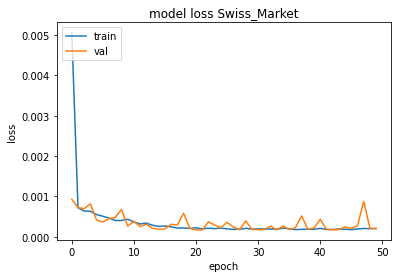

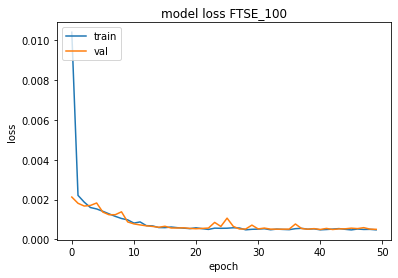

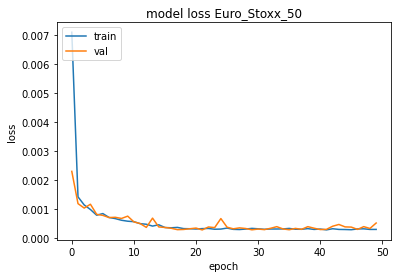

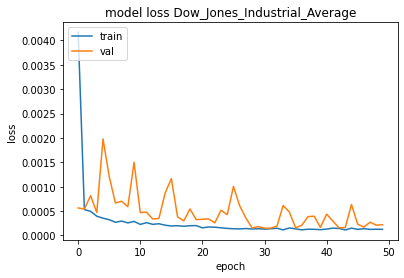

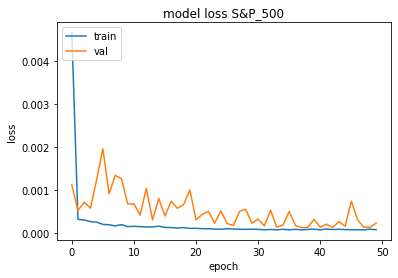

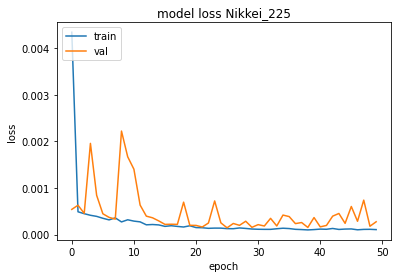

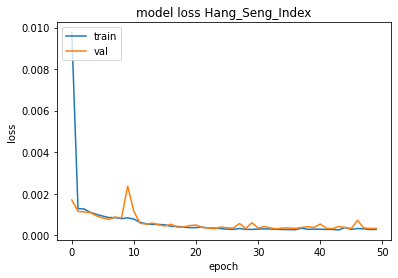

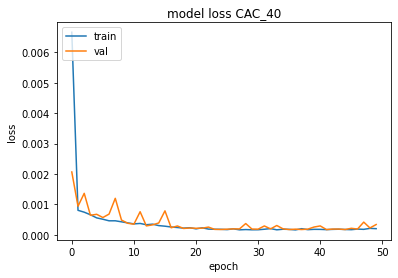

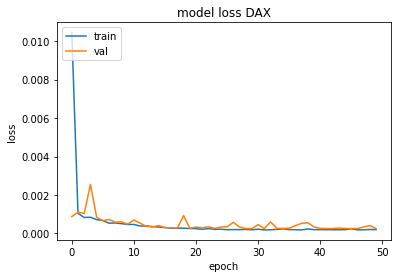

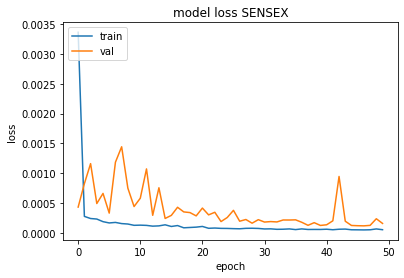

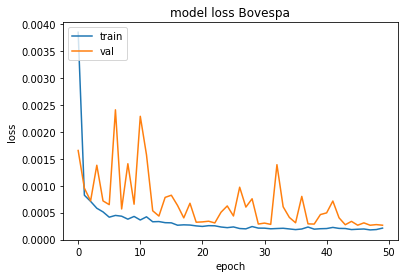

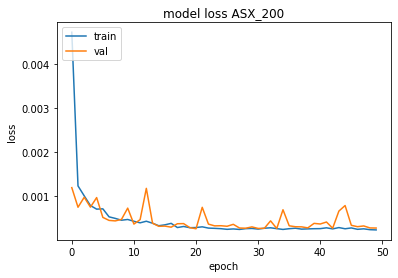

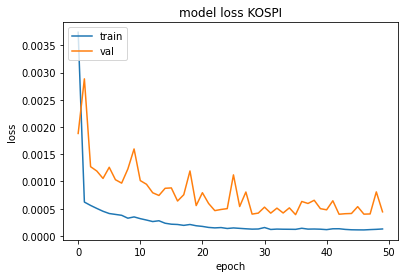

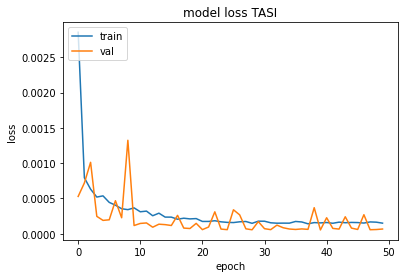

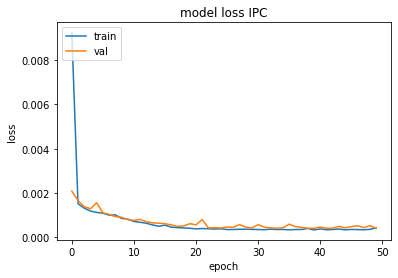

In [ ]:
for col in indices.keys():
    collection_name = "_".join([col]).replace(" ", "_")
    name_indice = collection_name + '_history_loss.log'

    file_path = f'../lib/model/data/historique/{name_indice}'
    df = pd.read_csv(file_path)
    plt.plot(df['loss'])
    plt.plot(df['val_loss'])
    plt.title(f'model loss {collection_name}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #print(df)

# DEUXIEME ENTRAINEMENT 

In [47]:
data2

,Date,Open,High,Low,Close,Volume
0,2012-07-02,4094.600098,4151.500000,4094.600098,4133.000000,0
1,2012-07-03,4133.000000,4141.799805,4119.899902,4127.200195,0
2,2012-07-04,4127.200195,4172.500000,4127.200195,4172.200195,0
3,2012-07-05,4172.200195,4175.799805,4157.000000,4169.200195,0
4,2012-07-06,4169.200195,4169.399902,4145.000000,4157.799805,0
...,...,...,...,...,...,...
2812,2023-08-15,7272.700195,7329.299805,7271.899902,7305.000000,610600
2813,2023-08-16,7284.500000,7284.500000,7185.200195,7195.200195,714000
2814,2023-08-17,7190.799805,7191.299805,7106.799805,7146.000000,897900
2815,2023-08-18,7151.500000,7167.700195,7124.500000,7148.100098,806300


In [56]:
prices[0+30]

array([4283.29980469])

In [57]:
data2.Close.head(31)

0     4133.000000
1     4127.200195
2     4172.200195
3     4169.200195
4     4157.799805
5     4118.299805
6     4098.000000
7     4096.500000
8     4068.000000
9     4082.199951
10    4105.100098
11    4140.799805
12    4123.600098
13    4206.700195
14    4199.100098
15    4128.899902
16    4133.200195
17    4123.899902
18    4147.700195
19    4209.799805
20    4245.700195
21    4269.200195
22    4262.799805
23    4269.500000
24    4221.500000
25    4272.600098
26    4291.600098
27    4312.600098
28    4308.299805
29    4277.299805
30    4283.299805
Name: Close, dtype: float64

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [41]:
data = data2.copy()
prices = data['Close'].values.reshape(-1, 1)
prices

array([[4133.        ],
       [4127.20019531],
       [4172.20019531],
       ...,
       [7146.        ],
       [7148.10009766],
       [7115.5       ]])

In [43]:
len(prices)

2817

In [45]:
len(prices) - 30

2787

In [51]:
prices[0:0+30]

array([[4133.        ],
       [4127.20019531],
       [4172.20019531],
       [4169.20019531],
       [4157.79980469],
       [4118.29980469],
       [4098.        ],
       [4096.5       ],
       [4068.        ],
       [4082.19995117],
       [4105.10009766],
       [4140.79980469],
       [4123.60009766],
       [4206.70019531],
       [4199.10009766],
       [4128.89990234],
       [4133.20019531],
       [4123.89990234],
       [4147.70019531],
       [4209.79980469],
       [4245.70019531],
       [4269.20019531],
       [4262.79980469],
       [4269.5       ],
       [4221.5       ],
       [4272.60009766],
       [4291.60009766],
       [4312.60009766],
       [4308.29980469],
       [4277.29980469]])

In [53]:
prices[2787:2787+30]

array([[7108.89990234],
       [7135.70019531],
       [7246.89990234],
       [7303.10009766],
       [7298.5       ],
       [7283.79980469],
       [7323.70019531],
       [7325.        ],
       [7313.89990234],
       [7306.39990234],
       [7339.70019531],
       [7402.        ],
       [7455.89990234],
       [7403.60009766],
       [7410.39990234],
       [7450.70019531],
       [7354.60009766],
       [7311.70019531],
       [7325.29980469],
       [7309.20019531],
       [7311.10009766],
       [7338.        ],
       [7357.39990234],
       [7340.10009766],
       [7277.        ],
       [7305.        ],
       [7195.20019531],
       [7146.        ],
       [7148.10009766],
       [7115.5       ]])

In [61]:
prices

array([[4133.        ],
       [4127.20019531],
       [4172.20019531],
       ...,
       [7146.        ],
       [7148.10009766],
       [7115.5       ]])

In [60]:
prices[-60:]

array([[7217.39990234],
       [7209.29980469],
       [7091.29980469],
       [7110.79980469],
       [7145.10009766],
       [7216.29980469],
       [7129.60009766],
       [7118.        ],
       [7099.70019531],
       [7122.5       ],
       [7138.89990234],
       [7161.70019531],
       [7175.29980469],
       [7251.20019531],
       [7294.89990234],
       [7357.79980469],
       [7314.89990234],
       [7195.5       ],
       [7099.20019531],
       [7078.70019531],
       [7118.20019531],
       [7196.5       ],
       [7194.89990234],
       [7203.29980469],
       [7246.10009766],
       [7279.        ],
       [7253.20019531],
       [7163.39990234],
       [7042.29980469],
       [7004.        ],
       [7108.89990234],
       [7135.70019531],
       [7246.89990234],
       [7303.10009766],
       [7298.5       ],
       [7283.79980469],
       [7323.70019531],
       [7325.        ],
       [7313.89990234],
       [7306.39990234],
       [7339.70019531],
       [7402.   

In [ ]:
# Préparation des séquences temporelles
sequence_length = 30
X = []
y = []
for i in range(len(prices) - sequence_length):
    X.append(prices[i:i+sequence_length])
    y.append(prices[i+sequence_length])

X = np.array(X)
y = np.array(y)

In [ ]:
# Normalisation des données
scaler = MinMaxScaler()
prices_normalized = scaler.fit_transform(prices)

# DEUXIEME ENTRAINEMENT

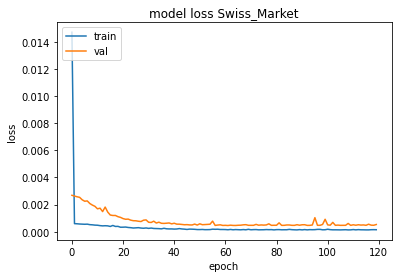

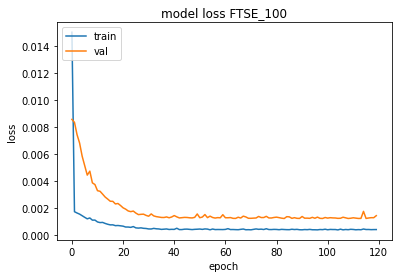

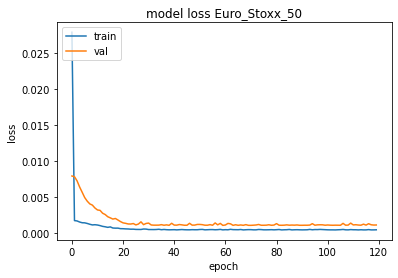

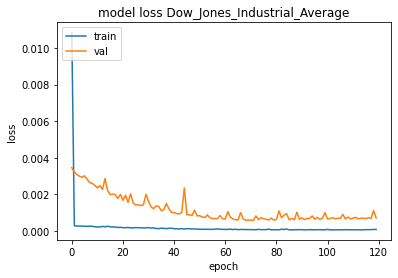

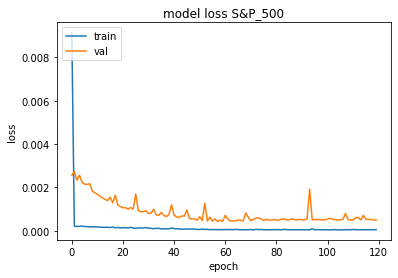

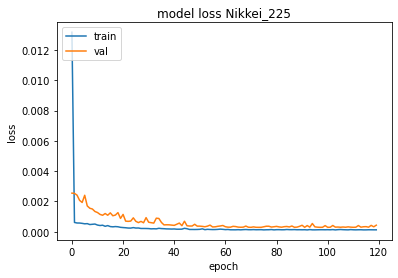

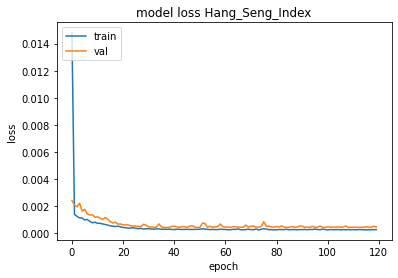

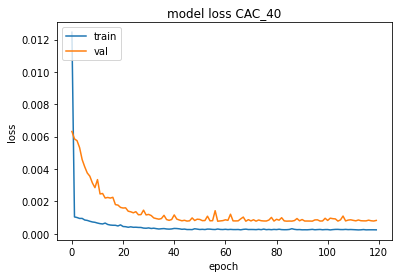

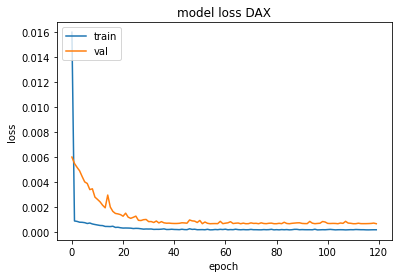

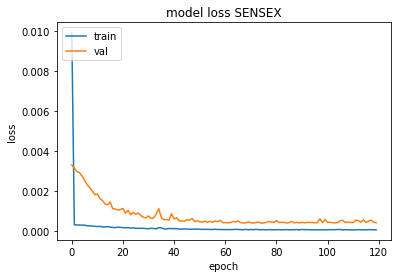

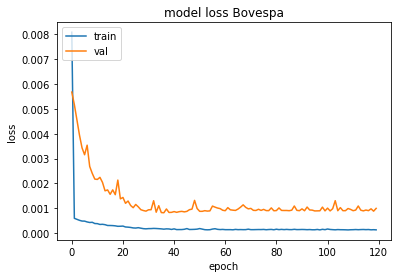

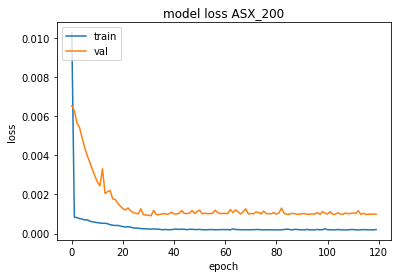

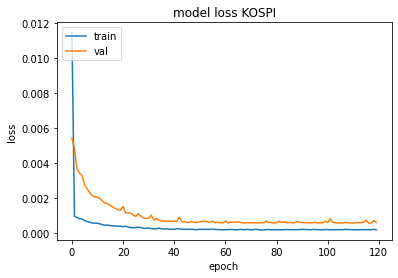

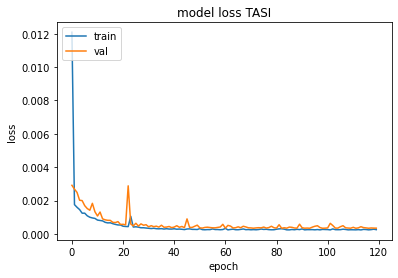

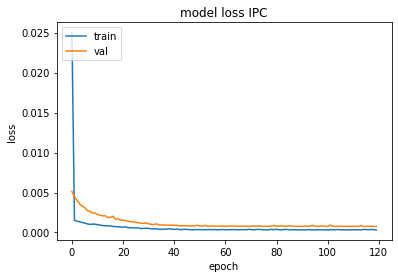

In [58]:
for col in indices.keys():
    collection_name = "_".join([col]).replace(" ", "_")
    name_indice = collection_name + '_history_loss.log'

    file_path = f'../lib/model/data/historique/{name_indice}'
    df = pd.read_csv(file_path)
    plt.plot(df['loss'])
    plt.plot(df['val_loss'])
    plt.title(f'model loss {collection_name}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #print(df)

In [44]:
new_model = tf.keras.models.load_model('../lib/model/data/modeles/Euro_Stoxx_50_model.h5')
# Show the model architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
connection_string = "mongodb://localhost:27017"
client = pymongo.MongoClient(connection_string)

DataBase_name_Strat = 'MemoireIndiceMarket_Strat'
collection_name = 'Euro_Stoxx_50'

In [125]:
db = client[DataBase_name_Strat]
collection = db[collection_name]
df_strat = pd.DataFrame(list(collection.find()))

In [126]:
df_strat = df_strat.drop('_id', axis=1)
df_strat

,Date,Open,High,Low,Close,Volume
0,2023-01-03,3852.070068,3921.370117,3852.070068,3882.290039,33158800
1,2023-01-04,3891.040039,3975.500000,3891.040039,3973.969971,39907300
2,2023-01-05,3967.010010,3974.610107,3950.419922,3959.479980,26926500
3,2023-01-06,3959.959961,4017.850098,3951.929932,4017.830078,28231800
4,2023-01-09,4027.510010,4080.550049,4025.159912,4068.620117,32735200
...,...,...,...,...,...,...
157,2023-08-18,4224.450195,4224.450195,4175.370117,4212.950195,23253500
158,2023-08-21,4212.600098,4262.169922,4212.600098,4224.870117,20937300
159,2023-08-22,4226.100098,4291.810059,4226.100098,4260.370117,19604800
160,2023-08-23,4260.970215,4294.290039,4248.819824,4266.669922,20544100


In [127]:
df_strat[60:]

,Date,Open,High,Low,Close,Volume
60,2023-03-28,4169.529785,4205.350098,4157.109863,4168.209961,30414100
61,2023-03-29,4168.609863,4233.589844,4168.609863,4231.270020,33769300
62,2023-03-30,4232.589844,4295.319824,4232.589844,4285.419922,29622300
63,2023-03-31,4285.839844,4325.339844,4278.310059,4315.049805,36312200
64,2023-04-03,4312.990234,4329.290039,4304.890137,4311.049805,29102200
...,...,...,...,...,...,...
157,2023-08-18,4224.450195,4224.450195,4175.370117,4212.950195,23253500
158,2023-08-21,4212.600098,4262.169922,4212.600098,4224.870117,20937300
159,2023-08-22,4226.100098,4291.810059,4226.100098,4260.370117,19604800
160,2023-08-23,4260.970215,4294.290039,4248.819824,4266.669922,20544100


In [128]:
len(df_strat)

162

In [129]:
def prepocessing(df):
    df_ = df[['Date','Close']]
    data = df.filter(['Close']) 
    dataset = data.values.reshape(-1, 1)
    print('================================================')
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data= scaler.fit_transform(dataset)
    train_data = scaled_data
    sequence_length = 60
    x_train = []
    y_train = []
    for i in range(len(train_data) - sequence_length):
        x_train.append(train_data[i:i+sequence_length])
        y_train.append(train_data[i+sequence_length]) 
        #x_train.append(train_data[i-60:i, 0])
        #y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    print('PREPROCESSING DONE')
    print('================================================')
    return x_train, y_train, scaler, data, dataset, df_

In [130]:
x_strat, y_strat, scaler, data, dataset, df_ = prepocessing(df_strat)

PREPROCESSING DONE


In [131]:
len(x_strat), len(y_strat)

(102, 102)

In [132]:
pred = new_model.predict(x_strat)

4/4 [==============================] - 0s 29ms/step


In [133]:
preds = scaler.inverse_transform(pred)
y_scal = scaler.inverse_transform(y_strat)
rmse = np.sqrt(np.mean(((preds - y_scal) ** 2)))
print('================================================')
print(f'RMSE: {rmse}')
print('================================================')

RMSE: 37.57231911358049


In [78]:
preds = scaler.inverse_transform(pred)
rmse = np.sqrt(np.mean(((pred - y_train) ** 2)))
print('================================================')
print(f'RMSE: {rmse}')
print('================================================')

RMSE: 0.13641583509013863


In [134]:
strategie = df_[60:]
strategie['Predictions'] = preds

<ipython-input-134-2221cc6c165c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strategie['Predictions'] = preds


In [135]:
strategie

,Date,Close,Predictions
60,2023-03-28,4168.209961,4166.150879
61,2023-03-29,4231.270020,4168.640625
62,2023-03-30,4285.419922,4233.415039
63,2023-03-31,4315.049805,4287.585938
64,2023-04-03,4311.049805,4316.105469
...,...,...,...
157,2023-08-18,4212.950195,4227.587402
158,2023-08-21,4224.870117,4214.688965
159,2023-08-22,4260.370117,4226.405762
160,2023-08-23,4266.669922,4262.540039


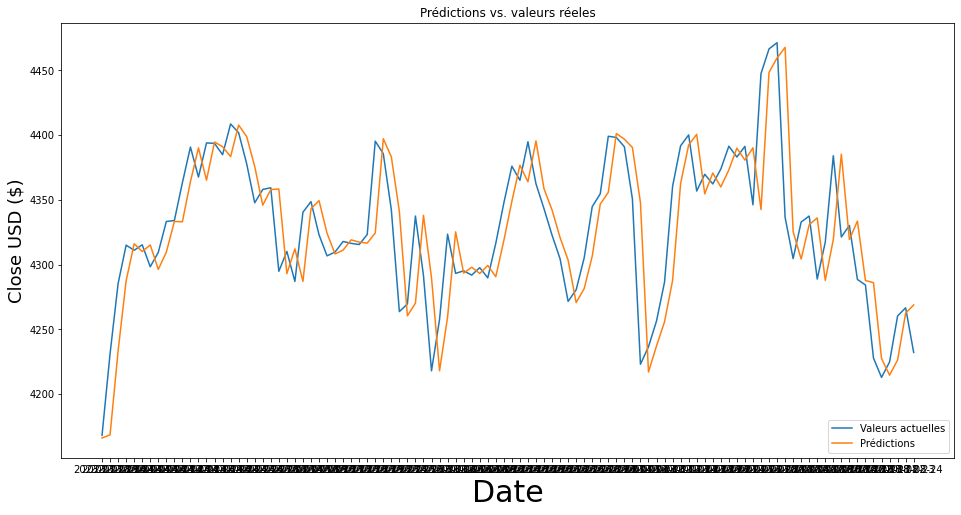

In [100]:
plt.figure(figsize=(16,8))
plt.title('Prédictions vs. valeurs réeles')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Close USD ($)', fontsize=18)

#plt.plot(strategie['Date'], strategie['Close'], linestyle='--', color='r')
#plt.plot(strategie['Close'])
#plt.plot(strategie['Predictions'])
#x_values = list(range(len(real_prices)))

# Tracez la courbe des cours réels en fonction des prédictions
plt.plot(strategie['Date'].values, strategie['Close'].values, label='Cours réels')
plt.plot(strategie['Date'].values, strategie['Predictions'].values, label='Prédictions')

plt.legend(['Valeurs actuelles', 'Prédictions'], loc='lower right')
plt.show()

In [136]:
import yfinance as yf
from datetime import date

start = '2023-01-01'
end = '2023-08-24' #date.today()  

ticket = yf.Ticker('AI.PA')
data = ticket.history(interval='1d', start=start, end=end)
data.reset_index(inplace=True)
data.drop(['Dividends','Stock Splits'], axis=1, inplace=True)
data['Date'] =  pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d')

In [137]:
data.head(2)

,Date,Open,High,Low,Close,Volume
0,2023-01-02,131.329911,132.567200,130.937111,132.567200,584325
1,2023-01-03,132.331511,134.138364,131.781605,132.233322,748439


In [138]:
df_strat.head(2)

,Date,Open,High,Low,Close,Volume
0,2023-01-03,3852.070068,3921.370117,3852.070068,3882.290039,33158800
1,2023-01-04,3891.040039,3975.500000,3891.040039,3973.969971,39907300


In [139]:
strategie.head(2)

,Date,Close,Predictions
60,2023-03-28,4168.209961,4166.150879
61,2023-03-29,4231.270020,4168.640625


In [140]:
len(data.Close), len(strategie.Close), len(df_strat)

(163, 102, 162)

In [147]:
data__ = data[61:]
#data = data[60:]
stock_returns = data__['Close'].pct_change().dropna()
benchmark_returns = strategie['Predictions'].pct_change().dropna()

covariance = np.cov(stock_returns, benchmark_returns)[0][1]
benchmark_variance = np.var(benchmark_returns)

beta = covariance / benchmark_variance
beta

0.6965494864824509

In [148]:
stock_returns

62     0.006260
63     0.010589
64     0.009823
65    -0.001556
66     0.003118
         ...   
158   -0.005323
159   -0.000373
160   -0.003735
161    0.005249
162    0.005967
Name: Close, Length: 101, dtype: float64

In [149]:
benchmark_returns

61     0.000598
62     0.015538
63     0.012796
64     0.006652
65    -0.001388
         ...   
157   -0.013649
158   -0.003051
159    0.002780
160    0.008550
161    0.001482
Name: Predictions, Length: 101, dtype: float32

In [143]:
data__ = data[1:]
#data = data[60:]
stock_returns = data__['Close'].pct_change().dropna()
benchmark_returns = df_strat['Close'].pct_change().dropna()

covariance = np.cov(stock_returns, benchmark_returns)[0][1]
benchmark_variance = np.var(benchmark_returns)

beta = covariance / benchmark_variance
beta

0.3789440356884122

In [144]:
data__ = data[61:]
#data = data[60:]
stock_returns = data__['Close'].pct_change().dropna()
benchmark_returns = strategie['Close'].pct_change().dropna()

covariance = np.cov(stock_returns, benchmark_returns)[0][1]
benchmark_variance = np.var(benchmark_returns)

beta = covariance / benchmark_variance
beta

0.10329407605657881

In [92]:
stock_returns = data[['Date','Close']]
benchmark_returns = strategie[['Date','Close']]

stock_returns = strategie['Close'].pct_change().dropna()
benchmark_returns = benchmark['Close'].pct_change().dropna()

covariance = np.cov(stock_returns, benchmark_returns)[0][1]
benchmark_variance = np.var(benchmark_returns)

beta = covariance / benchmark_variance

In [93]:
beta

1.0100000000000005

In [118]:
obj = yf.Ticker(indice_symbol)

In [28]:
dff = pd.read_csv('../INDICES.csv',sep=';')
dff.columns

Index(['SP500', 'HSI', 'CAC40', 'DAX', 'SENSEX', 'ASX', 'Swiss Market',
       'FTSE 100', 'Euro Stoxx 50', 'IPC', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [30]:
dff = dff.drop(['Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis=1)
dff

,SP500,HSI,CAC40,DAX,SENSEX,ASX,Swiss Market,FTSE 100,Euro Stoxx 50,IPC
0,MMM,SEHK: 9988,RI.PA,ADS,BJAUT IB,APN AT,LHN.SW,ABDN.L,DPW.DE,IENOVA.MX
1,AOS,SEHK: 3690,ORA.PA,ALV,BHEL IB,ALL AT,ZURN.SW,RMV.L,PHIA.AS,GCC.MX
2,ABT,SEHK: 700,CA.PA,BAS,BHARTI IB,AUN AT,SCMN.SW,RS1.L,INGA.AS,GMEXICOB.MX
3,ABBV,SEHK: 939,ML.PA,BAYN,CIPLA IB,BBG AT,SREN.SW,BA.L,AI.PA,MEGACPO.MX
4,ACN,SEHK: 9618,VIE.PA,BEI,COAL IB,CWN AT,NOVN.SW,RTO.L,SAF.PA,PINFRA.MX
...,...,...,...,...,...,...,...,...,...,...
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dff['CAC40'].dropna().values

array(['RI.PA', 'ORA.PA', 'CA.PA', 'ML.PA', 'VIE.PA', 'ACA.PA', 'MC.PA',
       'SGO.PA', 'CAP.PA', 'WLN.PA', 'KER.PA', 'ATO.PA', 'UG.PA',
       'ENGI.PA', 'AIR.PA', 'BN.PA', 'FP.PA', 'DG.PA', 'EN.PA', 'HO.PA',
       'BNP.PA', 'SW.PA', 'OR.PA', 'GLE.PA', 'LR.PA', 'AI.PA', 'VIV.PA',
       'SU.PA', 'SAN.PA', 'AC.PA'], dtype=object)

# TROISIEME ENTRAINEMENT

In [3]:
indices = {
    #'Swiss Market' : '^SSMI',
    #'FTSE 100' : '^FTSE',
    #'Euro Stoxx 50' : '^STOXX50E',
    #'Dow Jones Industrial Average' : '^DJI',
    'S&P 500' : '^GSPC',
    #'Nikkei 225' : '^N225',
    #'Hang Seng Index' : '^HSI',
    'CAC 40' : '^FCHI'
    #'DAX' : '^GDAXI',
    ##'Shanghai Composite Index' : '^SSEC',
    #'SENSEX' : '^BSESN',
    #'Bovespa' : '^BVSP',
    #'ASX 200' : '^AXJO',
    #'KOSPI' : '^KS11',
    #'TASI' : '^TASI.SR',
    #'IPC' : '^MXX'
}

In [2]:
indices.pop('Swiss Market')

'^SSMI'

In [3]:
indices

{'FTSE 100': '^FTSE',
 'Euro Stoxx 50': '^STOXX50E',
 'Dow Jones Industrial Average': '^DJI',
 'S&P 500': '^GSPC',
 'Nikkei 225': '^N225',
 'Hang Seng Index': '^HSI',
 'CAC 40': '^FCHI',
 'DAX': '^GDAXI',
 'SENSEX': '^BSESN',
 'Bovespa': '^BVSP',
 'ASX 200': '^AXJO',
 'KOSPI': '^KS11',
 'TASI': '^TASI.SR',
 'IPC': '^MXX'}

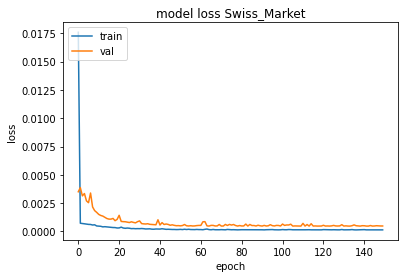

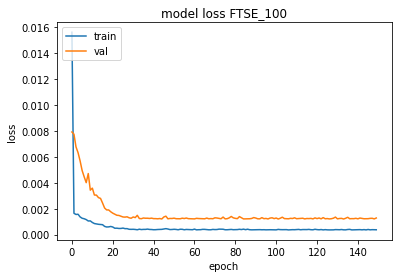

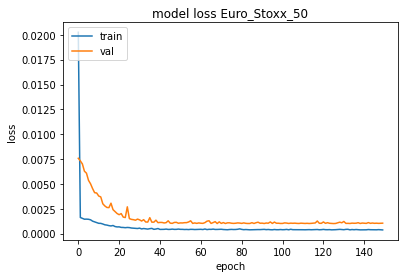

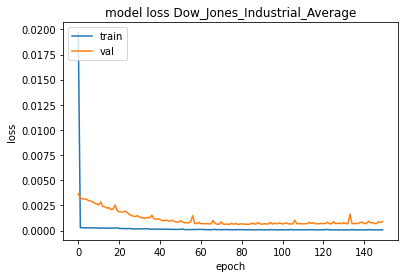

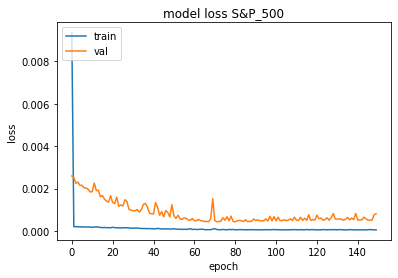

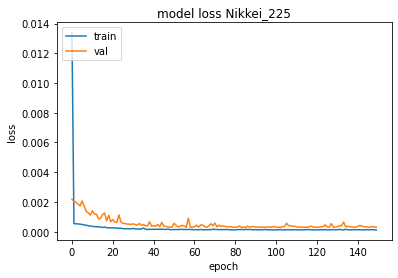

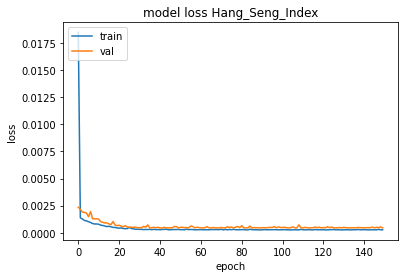

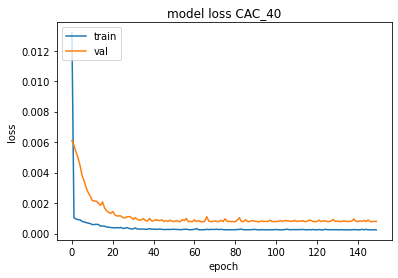

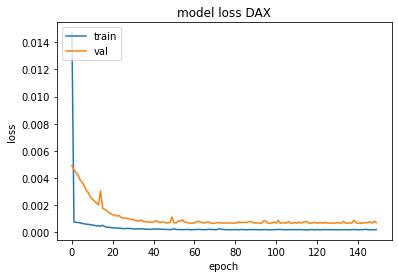

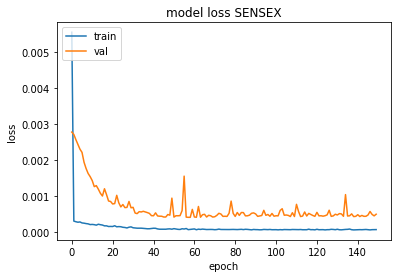

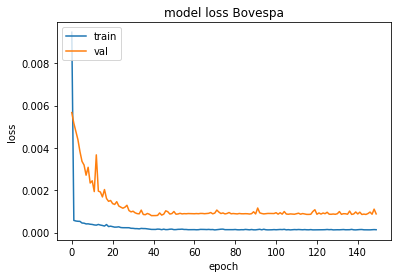

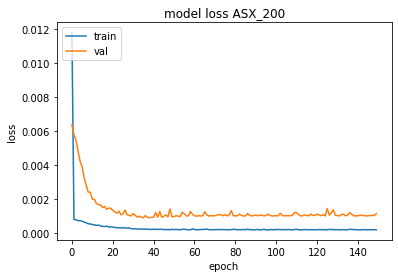

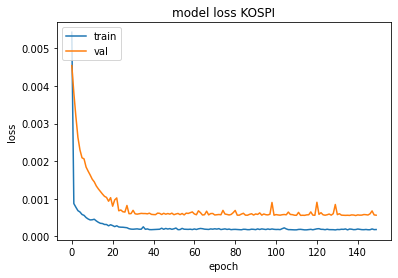

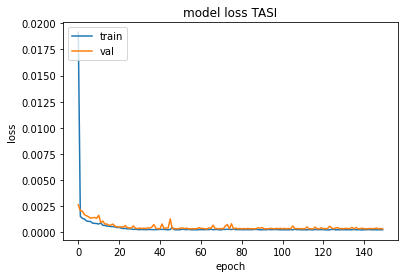

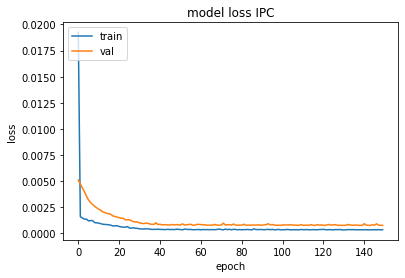

In [37]:
for col in indices.keys():
    collection_name = "_".join([col]).replace(" ", "_")
    name_indice = collection_name + '_history_loss.log'

    file_path = f'../lib/model/data/historique/{name_indice}'
    df = pd.read_csv(file_path)
    plt.plot(df['loss'])
    plt.plot(df['val_loss'])
    plt.title(f'model loss {collection_name}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #print(df)

In [8]:
for col in indices.keys():
    collection_name = "_".join([col]).replace(" ", "_")
    name_indice = collection_name + '_test_loss.csv'

    file_path = f'../lib/model/data/historique_test/{name_indice}'
    df = pd.read_csv(file_path)
    plt.plot(df['loss'])
    plt.plot(df['val_loss'])
    plt.title(f'model loss {collection_name}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    print(df)

Index(['Loss on test data'], dtype='object')
Index(['Loss on test data'], dtype='object')


# QUATRIEME ENTRAINEMENT

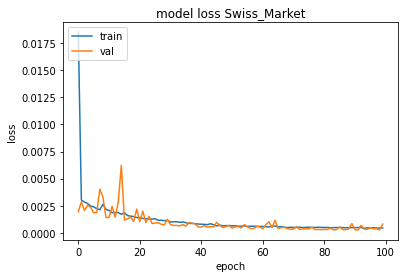

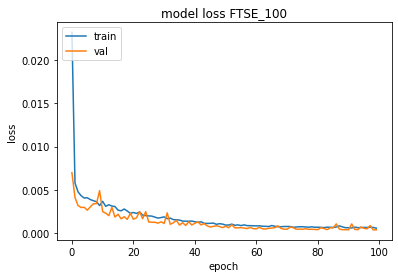

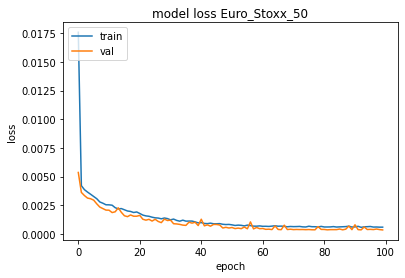

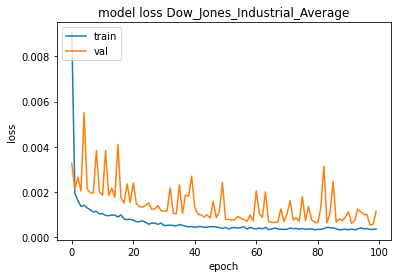

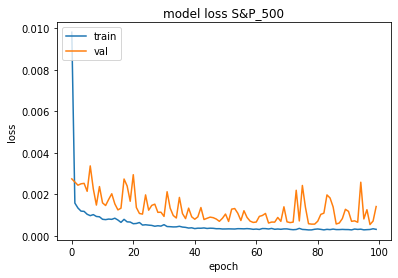

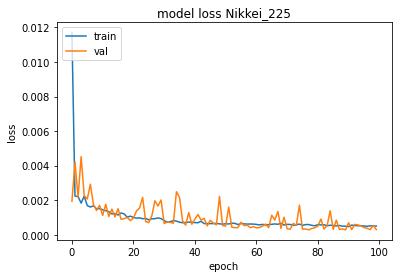

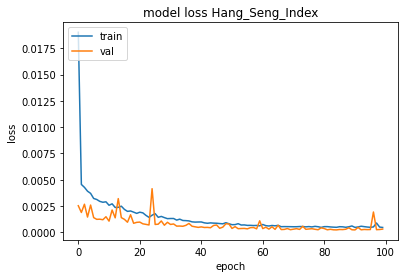

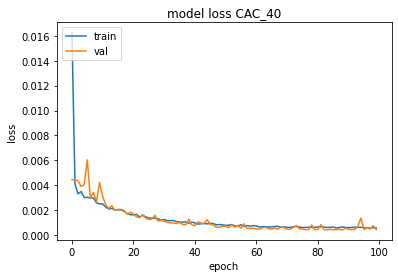

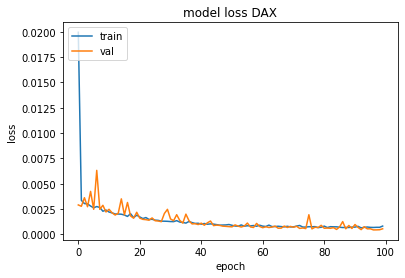

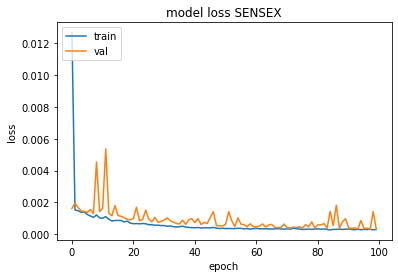

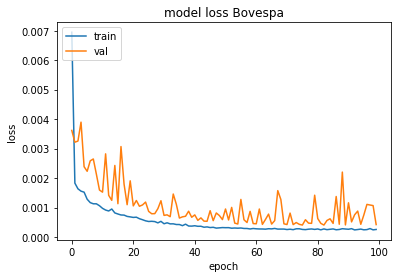

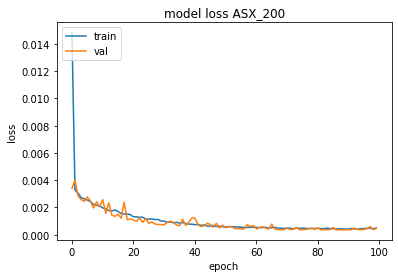

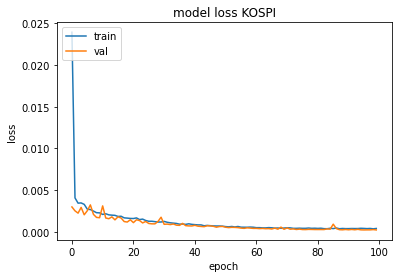

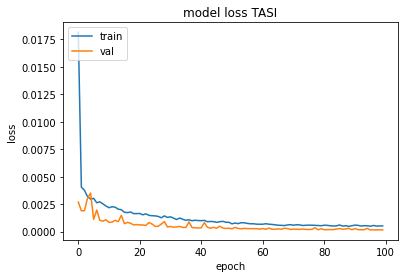

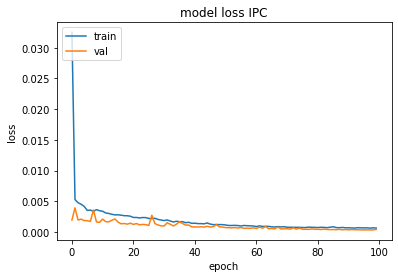

In [10]:
for col in indices.keys():
    collection_name = "_".join([col]).replace(" ", "_")
    name_indice = collection_name + '_history_loss.log'

    file_path = f'../lib/model/data/historique/{name_indice}'
    df = pd.read_csv(file_path)
    plt.plot(df['loss'])
    plt.plot(df['val_loss'])
    plt.title(f'model loss {collection_name}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #print(df)

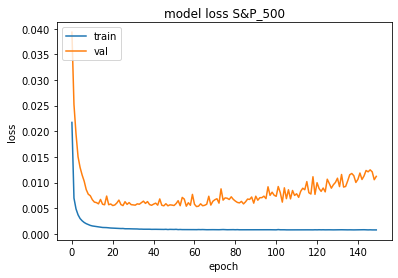

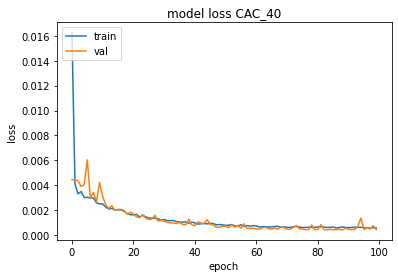

In [9]:
for col in indices.keys():
    collection_name = "_".join([col]).replace(" ", "_")
    name_indice = collection_name + '_history_loss.log'

    file_path = f'../lib/model/data/historique/{name_indice}'
    df = pd.read_csv(file_path)
    plt.plot(df['loss'])
    plt.plot(df['val_loss'])
    plt.title(f'model loss {collection_name}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #print(df)

In [16]:
pd.read_csv('../portefeuilles/data/CAC_40_Pred.csv').drop('Unnamed: 0', axis=1)


,true_obs,pred_obs,date
0,6015.509766,5987.479004,2021-03-29
1,6088.040039,6013.445801,2021-03-30
2,6067.229980,6084.217285,2021-03-31
3,6102.959961,6062.095703,2021-04-01
4,6131.339844,6096.958008,2021-04-06
...,...,...,...
450,6504.899902,6511.184082,2022-12-23
451,6550.660156,6502.326172,2022-12-27
452,6510.490234,6550.671387,2022-12-28
453,6573.470215,6504.914062,2022-12-29


In [15]:
pd.read_csv('../lib/data_beta/Beta_Company_CAC_40.csv').drop('Unnamed: 0', axis=1)


,CAC_40,CAC_40_Company_Beta
0,RI_PA,0.132346
1,ORA_PA,0.105563
2,CA_PA,0.154177
3,ML_PA,0.319784
4,VIE_PA,0.294478
5,ACA_PA,0.307977
6,MC_PA,0.352810
7,SGO_PA,0.473892
8,CAP_PA,0.253573
9,WLN_PA,0.344391
